In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 49.919893856492955
Iteration 2, RMSE: 50.642999961951396
Iteration 3, RMSE: 75.53038266298226
Iteration 4, RMSE: 55.61321323050722
Iteration 5, RMSE: 50.23358336350329
Iteration 6, RMSE: 113.25849827827753
Iteration 7, RMSE: 129.9947995644707
Iteration 8, RMSE: 133.1241939029172
Iteration 9, RMSE: 124.20126707549778
Iteration 10, RMSE: 120.91313122509045
Iteration 11, RMSE: 129.04093220467487
Iteration 12, RMSE: 117.22606248993996
Iteration 13, RMSE: 125.595631150169
Iteration 14, RMSE: 132.747326490587
Iteration 15, RMSE: 129.73403403075474
Iteration 16, RMSE: 125.95292151919271
Iteration 17, RMSE: 114.10537703309033
Iteration 18, RMSE: 111.58003098444262
Iteration 19, RMSE: 123.92483838338566
Iteration 20, RMSE: 118.06846237135835
Iteration 21, RMSE: 107.99002832204323
Iteration 22, RMSE: 108.61568349706384
Iteration 23, RMSE: 107.81460424030047
Iteration 24, RMSE: 116.78185896271872
Iteration 25, RMSE: 128.31463049016256
Iteration 26, RMSE: 117.73465401017792
Iter

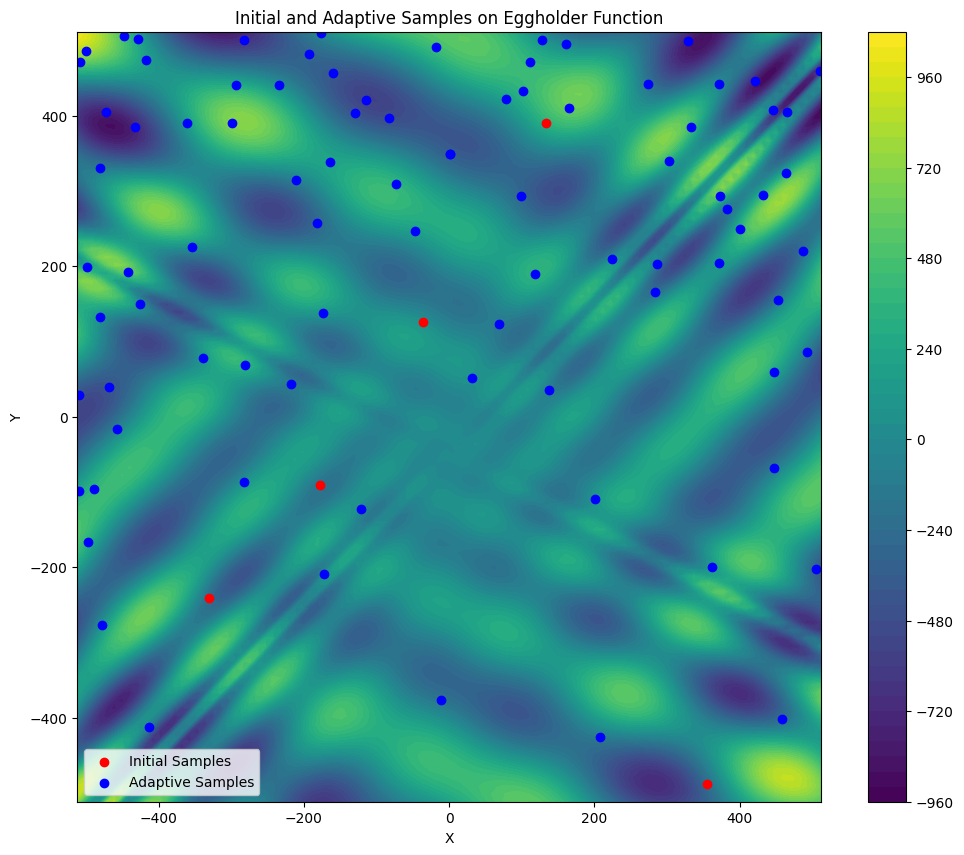

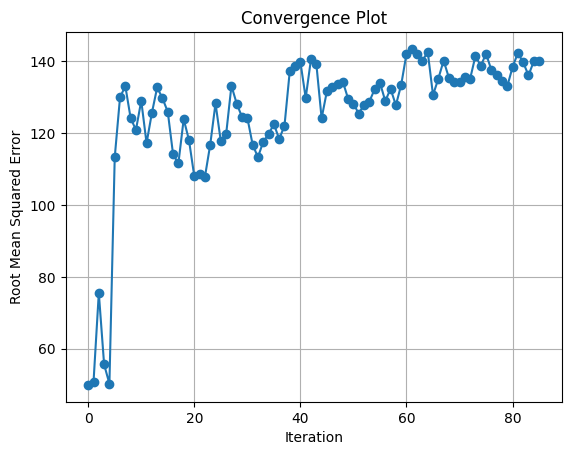

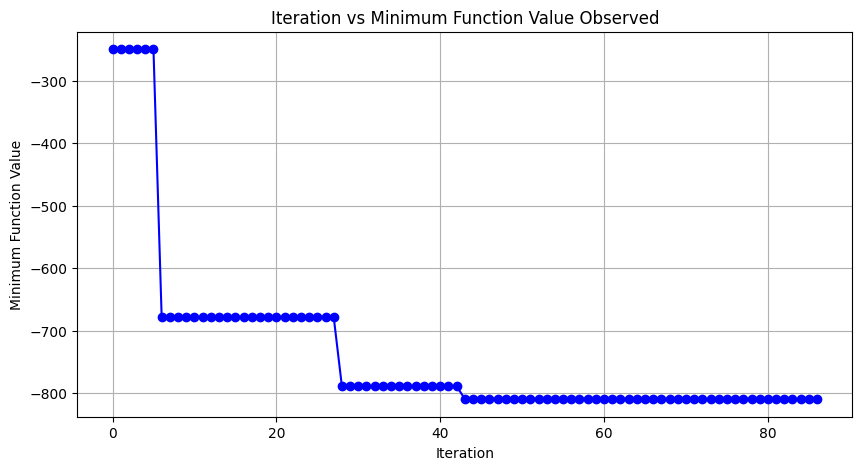

Best observed function value after active learning: -809.7953240794386
             X           Y
0   354.903229 -488.941590
1   -36.379797  125.667296
2  -177.865163  -91.183517
3   132.917704  390.810202
4  -330.141489 -241.138306
..         ...         ...
87 -425.585326  149.716500
88  224.292517  209.577759
89 -361.089587  390.880734
90    1.000808  349.799357
91    1.000808  349.799357

[92 rows x 2 columns]


In [4]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh([(-512, 512), (-512, 512)], num_points=100, function=ex_func.eggholder)

# Generate initial samples
lhs_sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = lhs_sampler.sample(num_samples=5, ranges = [(-512, 512), (-512, 512)] )
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, lhs_sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(5, [(-512, 512), (-512, 512)])

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder")